# Prinicpal Components Analysis

# Objective
1. Dimension Reduction
2. Visualization

# Assumptions

1. There should be multple independent variables that needs to be continuous.

2. There needs to be a linear relationship between all variables.
   In practice, this assumption is somewhat relaxed.

3. Sampling adequacy. 
   For PCA to produce a reliable result, large enough sample sizes are required.
   Generally speaking, a minimum of 150 cases, or 5 to 10 cases per variable, has been recommended as a minimum sample          size.

4. Your data should be suitable for data reduction.
   You need to have adequate correlations between the variables in order for variables to be reduced to a smaller              number of components.

5. No significant outliers. 

# Pros

1. Removes Correlated Features
2. Improves Algorithm Performance
3. Reduces Overfitting
4. Improves Visualization

# Cons

1. Independent variables become less interpretable
2. Data standardization is must before PCA
3. Information Loss

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skt
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import math

# Exploratory Data Analysis

In [5]:
sales = pd.read_csv("train_kOBLwZA.csv")
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# replacing the same values with different names in a variable to narrow the unique values to one.

In [6]:
sales["Item_Fat_Content"].replace(to_replace=['Low Fat','low fat', 'LF'], value="Low_Fat", inplace=True) 

In [7]:
sales["Item_Fat_Content"].replace(to_replace=['Regular', 'reg'], value="Regular", inplace=True)

In [8]:
sales["Outlet_Type"].replace(to_replace=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], value="SuperMarket", inplace=True)

In [9]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Creating dummies & Adding as new variables

In [10]:
col_dummies = pd.get_dummies(sales[["Item_Fat_Content","Outlet_Type", "Outlet_Location_Type", "Outlet_Size"]], prefix=["Fat", " ", "City", "Size"])

In [11]:
col_dummies

,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,1,0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0
2,1,0,0,1,1,0,0,0,1,0
3,0,1,1,0,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,1,0,0,1,1,0,0
8519,0,1,0,1,0,1,0,0,0,0
8520,1,0,0,1,0,1,0,0,0,1
8521,0,1,0,1,0,0,1,0,1,0


In [12]:
new_sales = pd.concat([sales, col_dummies], axis=1)

In [13]:
new_sales.drop(["Item_Fat_Content","Outlet_Type", "Outlet_Location_Type", "Outlet_Size"], axis=1, inplace=True)

In [14]:
new_sales.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,1,0,0,1,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,1,0,0,1,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0,1,1,0,0,0,1,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,1,0,0,1,0,0,1,1,0,0


# Handling Missing Values

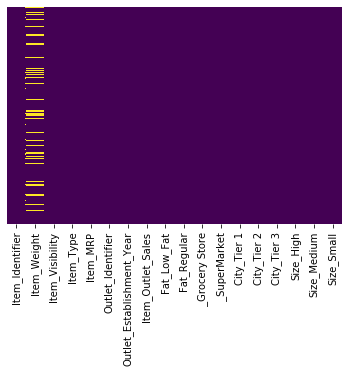

In [15]:
sns.heatmap(new_sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
new_sales["Item_Weight"].fillna(value=new_sales["Item_Weight"].mean(), inplace=True)

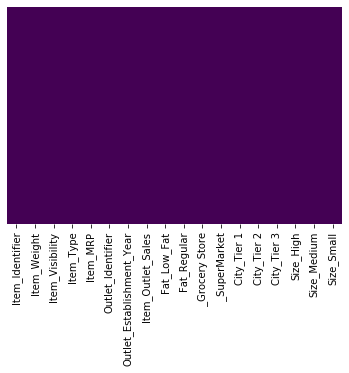

In [19]:
sns.heatmap(new_sales.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Correlation Observation

In [21]:
new_sales[['Fat_Low_Fat', 'Fat_Regular', ' _Grocery Store',
       ' _SuperMarket', 'City_Tier 1', 'City_Tier 2', 'City_Tier 3',
       'Size_High', 'Size_Medium', 'Size_Small','Item_Outlet_Sales']].corr()

,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small,Item_Outlet_Sales
Fat_Low_Fat,1.000000,-1.000000,0.002924,-0.002924,-0.003155,0.003272,-0.000241,0.002132,-0.004671,0.002313,-0.018719
Fat_Regular,-1.000000,1.000000,-0.002924,0.002924,0.003155,-0.003272,0.000241,-0.002132,0.004671,-0.002313,0.018719
_Grocery Store,0.002924,-0.002924,1.000000,-1.000000,0.176158,-0.265803,0.093276,-0.133686,-0.266370,0.176158,-0.411727
_SuperMarket,-0.002924,0.002924,-1.000000,1.000000,-0.176158,0.265803,-0.093276,0.133686,0.266370,-0.176158,0.411727
City_Tier 1,-0.003155,0.003155,0.176158,-0.176158,1.000000,-0.434653,-0.502066,-0.218609,0.082072,0.458964,-0.111287
City_Tier 2,0.003272,-0.003272,-0.265803,0.265803,-0.434653,1.000000,-0.560639,-0.244113,-0.486397,0.083381,0.058261
City_Tier 3,-0.000241,0.000241,0.093276,-0.093276,-0.502066,-0.560639,1.000000,0.435419,0.391617,-0.502066,0.046376
Size_High,0.002132,-0.002132,-0.133686,0.133686,-0.218609,-0.244113,0.435419,1.000000,-0.244634,-0.218609,0.024170
Size_Medium,-0.004671,0.004671,-0.266370,0.266370,0.082072,-0.486397,0.391617,-0.244634,1.000000,-0.435580,0.204701
Size_Small,0.002313,-0.002313,0.176158,-0.176158,0.458964,0.083381,-0.502066,-0.218609,-0.435580,1.000000,-0.098403


In [65]:
inp = new_sales.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier','Item_Type'], axis=1)
inp.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,9.30,0.016047,249.8092,1999,1,0,0,1,1,0,0,0,1,0
1,5.92,0.019278,48.2692,2009,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,0,1,1,0,0,0,1,0
3,19.20,0.000000,182.0950,1998,0,1,1,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,1,0,0,1,1,0,0


# standardizing dataset

In [67]:
sc = StandardScaler()
inp_scaled = sc.fit_transform(inp)
inp_scaled = pd.DataFrame(inp_scaled)
inp_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.831187,-0.970732,1.747454,0.139541,0.738147,-0.738147,-0.381529,0.381529,1.602840,-0.696678,-0.804732,-0.350395,1.432326,-0.623893
1,-1.630810,-0.908111,-1.489023,1.334103,-1.354743,1.354743,-0.381529,0.381529,-0.623893,-0.696678,1.242650,-0.350395,1.432326,-0.623893
2,1.108727,-0.956917,0.010040,0.139541,0.738147,-0.738147,-0.381529,0.381529,1.602840,-0.696678,-0.804732,-0.350395,1.432326,-0.623893
3,1.510904,-1.281758,0.660050,0.020085,-1.354743,1.354743,2.621031,-2.621031,-0.623893,-0.696678,1.242650,-0.350395,-0.698165,-0.623893
4,-0.918719,-1.281758,-1.399220,-1.293934,0.738147,-0.738147,-0.381529,0.381529,-0.623893,-0.696678,1.242650,2.853918,-0.698165,-0.623893


reassiging column names

In [68]:
inp_scaled.columns = inp.columns
inp_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Fat_Low_Fat,Fat_Regular,_Grocery Store,_SuperMarket,City_Tier 1,City_Tier 2,City_Tier 3,Size_High,Size_Medium,Size_Small
0,-0.831187,-0.970732,1.747454,0.139541,0.738147,-0.738147,-0.381529,0.381529,1.602840,-0.696678,-0.804732,-0.350395,1.432326,-0.623893
1,-1.630810,-0.908111,-1.489023,1.334103,-1.354743,1.354743,-0.381529,0.381529,-0.623893,-0.696678,1.242650,-0.350395,1.432326,-0.623893
2,1.108727,-0.956917,0.010040,0.139541,0.738147,-0.738147,-0.381529,0.381529,1.602840,-0.696678,-0.804732,-0.350395,1.432326,-0.623893
3,1.510904,-1.281758,0.660050,0.020085,-1.354743,1.354743,2.621031,-2.621031,-0.623893,-0.696678,1.242650,-0.350395,-0.698165,-0.623893
4,-0.918719,-1.281758,-1.399220,-1.293934,0.738147,-0.738147,-0.381529,0.381529,-0.623893,-0.696678,1.242650,2.853918,-0.698165,-0.623893


Fitting PCA
#pca = PCA(n_components=2)

In [79]:
pca = PCA(.85)
inp_scaled_pca = pca.fit_transform(inp_scaled) 

In [80]:
inp_scaled_pca

array([[-0.32827339, -0.22883225, -1.0218469 , ...,  0.07571355,
         0.65935596,  1.80866263],
       [-0.86492847, -1.65847248,  1.96657382, ...,  1.36597237,
        -2.07445669,  0.00945615],
       [-0.3256562 , -0.24752492, -1.09289113, ...,  0.0515865 ,
         0.78831682, -0.78675205],
       ...,
       [-1.52097147,  1.73350786, -1.05998658, ..., -0.4260406 ,
        -1.02743312, -0.24513952],
       [-0.33405018, -1.42453783,  2.09820338, ...,  1.88050515,
        -1.28094119,  0.51480635],
       [ 0.22871063,  1.50918753, -1.11676875, ..., -1.39209505,
        -0.46681692, -1.04378977]])

In [81]:
inp_pca =pd.DataFrame(inp_scaled_pca)
inp_pca.head()

,0,1,2,3,4,5,6
0,-0.328273,-0.228832,-1.021847,2.386615,0.075714,0.659356,1.808663
1,-0.864928,-1.658472,1.966574,0.721397,1.365972,-2.074457,0.009456
2,-0.325656,-0.247525,-1.092891,2.389070,0.051586,0.788317,-0.786752
3,2.699636,-0.126224,1.725086,-1.553160,1.399787,1.721216,-0.803631
4,0.406641,-2.538651,-1.134403,-1.258928,-2.338085,-1.728684,-0.312043


Combining principal components with output variable


In [83]:
updated_sales = pd.concat([inp_pca, new_sales['Item_Outlet_Sales']], axis=1)
updated_sales.head()

,0,1,2,3,4,5,6,Item_Outlet_Sales
0,-0.328273,-0.228832,-1.021847,2.386615,0.075714,0.659356,1.808663,3735.1380
1,-0.864928,-1.658472,1.966574,0.721397,1.365972,-2.074457,0.009456,443.4228
2,-0.325656,-0.247525,-1.092891,2.389070,0.051586,0.788317,-0.786752,2097.2700
3,2.699636,-0.126224,1.725086,-1.553160,1.399787,1.721216,-0.803631,732.3800
4,0.406641,-2.538651,-1.134403,-1.258928,-2.338085,-1.728684,-0.312043,994.7052


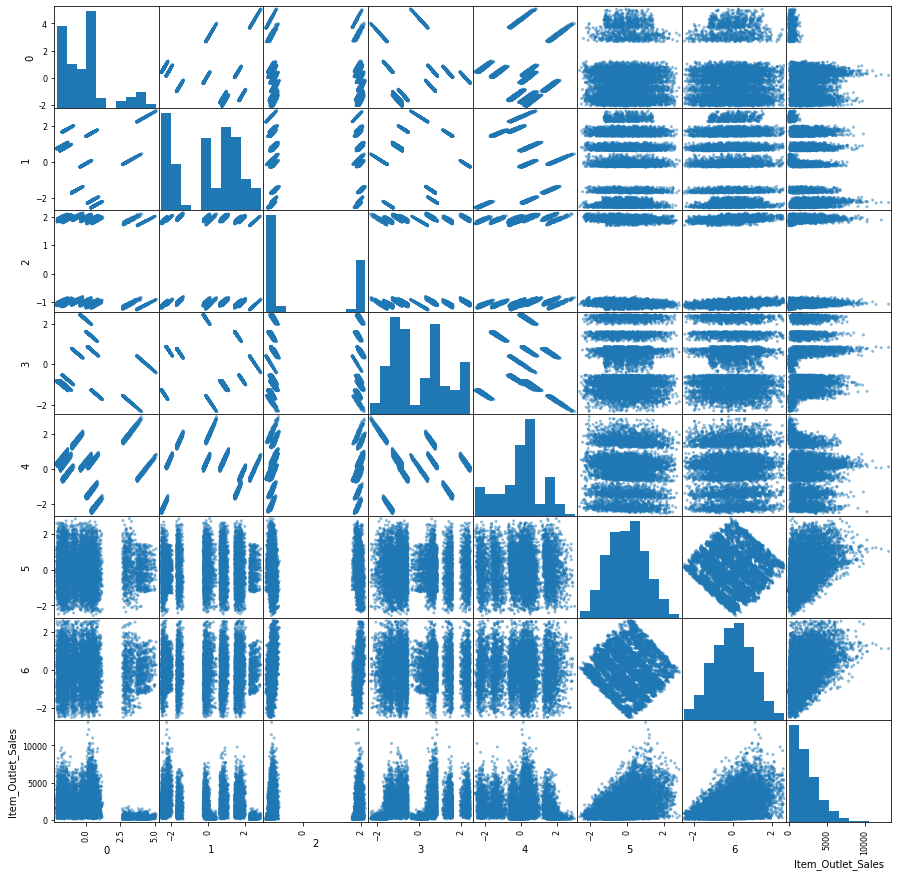

In [89]:
pd.plotting.scatter_matrix(updated_sales, figsize=(15, 15))
plt.show()

# Preparing data for linear regression

In [90]:
inp_vars = updated_sales[[0,1,2,3,4,5,6]]
inp_vars = sm.add_constant(updated_sales[[0,1,2,3,4,5,6]]) # adding a constant for B0

out_vars = updated_sales[['Item_Outlet_Sales']]

C:\Users\zaina\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Linear Regression model with newly computed principal components


In [91]:
model1 = LinearRegression()
model1 = sm.OLS(out_vars, inp_vars).fit()
model1_predictions = model1.predict(inp_vars)

# print(model1_predictions.head())

model1_summary = model1.summary()
print(model1_summary)

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     1159.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        02:19:58   Log-Likelihood:                -72670.
No. Observations:                8523   AIC:                         1.454e+05
Df Residuals:                    8515   BIC:                         1.454e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2181.2889     13.232    164.848      0.0